In [1]:
#code 3-1 tensor with 1 or 0
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2023-01-08 20:30:25.649262: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 20:30:25.649560: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# code 3-2 random tensor
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.) #표준편차 1 평균이 1인 정규 분포에서 뽑은 랜던값
print(x)
x = tf.random.uniform(shape=(3,1),minval=0., maxval=1.) #최소 0에서 최대 1 사이의 균등 분포에서 뽑은 랜덤값
print(x)

tf.Tensor(
[[0.32532892]
 [0.8667175 ]
 [0.9838208 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.3001715]
 [0.8160777]
 [0.2839476]], shape=(3, 1), dtype=float32)


In [5]:
#code 3-3 assign a value to numpy array
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [6]:
#code 3-4 can not assign a value to tensor
x = tf.ones(shape=(2,2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
#code 3-5 make a tensor variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.2489079 ],
       [0.7922153 ],
       [0.12586612]], dtype=float32)>


In [8]:
#code 3-6 assign a value to tensor variable
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
#code 3-7 assign a value to partial tensor
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
#code 3-8 use assign_add function
v.assign_add(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [12]:
#code 3-9 basic math 
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a,b)
e *=d
print(a,b,c,d,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[0.99999994 0.99999994]
 [0.99999994 0.99999994]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [13]:
#code 3-10 use gradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [16]:
#code 3-11 use gradient tape with constant tensor input
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result,input_const)

In [17]:
#code 3-12 get gradient's gradient second order gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position,time)
acceleration = outer_tape.gradient(speed,time)
print(acceleration)        

tf.Tensor(9.8, shape=(), dtype=float32)


# 3.5.4 엔드 투 엔드 예제 : 텐서플로 선형 분류기

In [18]:
#code 3-13 2d 평면에 두 클래스의 랜덤한 포인트 생성하기
num_samples_per_class=1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

In [20]:
#code 3-14 두 클래스를 (2000,2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
print(inputs.shape)
print(negative_samples.shape)
print(positive_samples.shape)

(2000, 2)
(1000, 2)
(1000, 2)


In [21]:
#code 3-15 make a target
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                    np.ones((num_samples_per_class,1),dtype='float32')))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


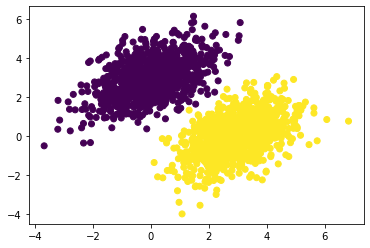

In [22]:
#code 3-16 draw a plot
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [34]:
#code 3-17 선형 분류기의 변수 만들기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [39]:
#code 3-18 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W) + b

In [40]:
#code 3-19 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [41]:
#code 3-20 learning step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [42]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.8722
Loss at step 1: 0.6163
Loss at step 2: 0.1999
Loss at step 3: 0.1418
Loss at step 4: 0.1267
Loss at step 5: 0.1174
Loss at step 6: 0.1095
Loss at step 7: 0.1023
Loss at step 8: 0.0957
Loss at step 9: 0.0897
Loss at step 10: 0.0842
Loss at step 11: 0.0792
Loss at step 12: 0.0746
Loss at step 13: 0.0704
Loss at step 14: 0.0666
Loss at step 15: 0.0631
Loss at step 16: 0.0599
Loss at step 17: 0.0570
Loss at step 18: 0.0543
Loss at step 19: 0.0519
Loss at step 20: 0.0496
Loss at step 21: 0.0476
Loss at step 22: 0.0457
Loss at step 23: 0.0440
Loss at step 24: 0.0425
Loss at step 25: 0.0411
Loss at step 26: 0.0398
Loss at step 27: 0.0386
Loss at step 28: 0.0375
Loss at step 29: 0.0365
Loss at step 30: 0.0356
Loss at step 31: 0.0347
Loss at step 32: 0.0340
Loss at step 33: 0.0333
Loss at step 34: 0.0327
Loss at step 35: 0.0321
Loss at step 36: 0.0316
Loss at step 37: 0.0311
Loss at step 38: 0.0306
Loss at step 39: 0.0302


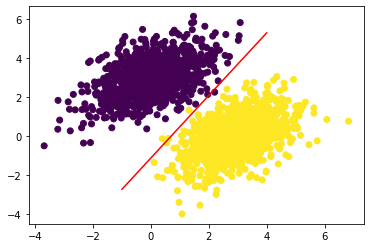

In [44]:
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()